# Trabalho 1 - Aprendizado de Máquina
Semestre: 2022/1
Professor: Murilo Naldi

Alunos: 

    Áquila
    Mateus
    Leticia


# Pré-processamento
### Dataset de registro de chuva na Austrália.

Dataset disponível em: https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package
Acesso em 25/07/22

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
url = "https://drive.google.com/file/d/1MD3PGukKJ2k-nw9lb5FRo1bqUJZZWOF8/view?usp=sharing"
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
dataset = pd.read_csv(url, encoding='utf-8', na_values=['nan'])

Pré visualização de todas as colunas

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
dataset.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


Informações dos tipos das colunas e quantidade de valores nulos

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

## Tratando dados faltantes

Remoção de valores nulos para a coluna RainToday, RainTomorrow(target) e colunas nominais

In [6]:
dataset.dropna(subset=["RainToday", "RainTomorrow","WindGustDir","WindDir3pm", "WindDir9am"], inplace=True)

Substituição de valores nulos nas colunas numéricos por 0

In [7]:
for column in dataset.select_dtypes(include=[np.float64]):
  dataset[column] = dataset[column].fillna(0)

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123710 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           123710 non-null  object 
 1   Location       123710 non-null  object 
 2   MinTemp        123710 non-null  float64
 3   MaxTemp        123710 non-null  float64
 4   Rainfall       123710 non-null  float64
 5   Evaporation    123710 non-null  float64
 6   Sunshine       123710 non-null  float64
 7   WindGustDir    123710 non-null  object 
 8   WindGustSpeed  123710 non-null  float64
 9   WindDir9am     123710 non-null  object 
 10  WindDir3pm     123710 non-null  object 
 11  WindSpeed9am   123710 non-null  float64
 12  WindSpeed3pm   123710 non-null  float64
 13  Humidity9am    123710 non-null  float64
 14  Humidity3pm    123710 non-null  float64
 15  Pressure9am    123710 non-null  float64
 16  Pressure3pm    123710 non-null  float64
 17  Cloud9am       123710 non-nul

## Transformação do target e de Date

O atributo alvo deste problema é 'RainTomorrow', ou seja, se ocorre chuva no dia seguinte. Os valores possíveis são 'No' e 'Yes'. Por questão de padronização, serão transformados em um atributo numérico binário(porém ainda nominal).

In [9]:
dataset["RainTomorrow"].unique()

array(['No', 'Yes'], dtype=object)

In [10]:
dataset.loc[dataset.RainTomorrow=='Yes','RainTomorrow'] = 1.0
dataset.loc[dataset.RainTomorrow=='No','RainTomorrow'] = 0.0

dataset.loc[dataset.RainToday=='Yes','RainToday'] = 1.0
dataset.loc[dataset.RainToday=='No','RainToday'] = 0.0

dataset["RainTomorrow"] = dataset["RainTomorrow"].astype(float)
dataset["RainToday"] = dataset["RainToday"].astype(float)

A coluna de data possui o identificador de dia, gerando dados únicos a cada observação. Já que o problema envolve previsão do tempo, é relevante analisar a sazonalidade de meses do ano e até de anos.

In [11]:
dataset["Date"].head()

0    2008-12-01
1    2008-12-02
2    2008-12-03
3    2008-12-04
4    2008-12-05
Name: Date, dtype: object

In [12]:
def splitData(column):
    year = []
    month = []
    for row in column:
        year.append(row.split("-")[0])
        month.append(row.split("-")[1])
        
    return year, month

In [13]:
dataset["Year"], dataset["Month"]=splitData(dataset["Date"])

In [14]:
dataset["Year"]=dataset["Year"].astype(float)
dataset["Month"]=dataset["Month"].astype(float)

In [15]:
dataset.drop(columns="Date", inplace=True)

In [16]:
dataset.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month
0,Albury,13.4,22.9,0.6,0.0,0.0,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,0.0,16.9,21.8,0.0,0.0,2008.0,12.0
1,Albury,7.4,25.1,0.0,0.0,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,0.0,0.0,17.2,24.3,0.0,0.0,2008.0,12.0
2,Albury,12.9,25.7,0.0,0.0,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,0.0,2.0,21.0,23.2,0.0,0.0,2008.0,12.0
3,Albury,9.2,28.0,0.0,0.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,0.0,0.0,18.1,26.5,0.0,0.0,2008.0,12.0
4,Albury,17.5,32.3,1.0,0.0,0.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0,0.0,2008.0,12.0


## Visualização de dados

In [17]:
import seaborn as sns

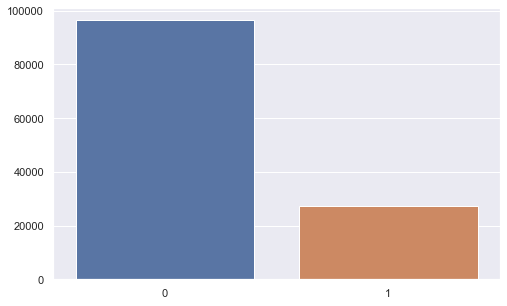

In [18]:
sns.set(rc={'figure.figsize':(8,5)})
values = [0,1]
count = dataset['RainTomorrow'].value_counts()
ax = sns.barplot(x=values, y=[count[0], count[1]], data=dataset)

In [19]:
years_data = dataset["Year"].copy()
years_data = years_data.sort_values()
values_years = years_data.unique()
count = years_data.value_counts()

registers_year = []
for value in values_years:
    registers_year.append(count[value])

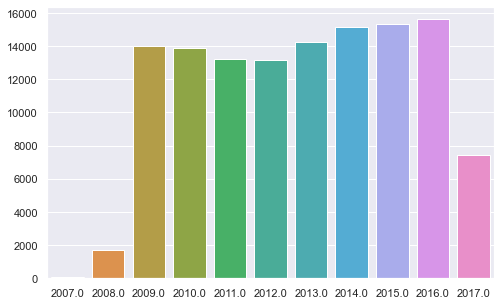

In [20]:
ax = sns.barplot(x=values_years, y=registers_year)

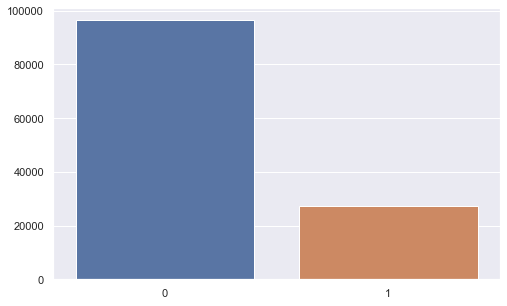

In [21]:
sns.set(rc={'figure.figsize':(8,5)})
values = [0,1]
count = dataset['RainTomorrow'].value_counts()
ax = sns.barplot(x=values, y=[count[0], count[1]], data=dataset)

### Matriz de correlação entre os atributos

Correlação positiva: Quando um atributo cresce, o outro também cresce


Correlação negativa: Quando um atributo cresce, o outro decresce

ρ = 0,9 a 0,7 (positivo ou negativo): correlação forte;


ρ = 0,5 a 0,7 (positivo ou negativo): correlação moderada;


ρ = 0,3 a 0,5 (positivo ou negativo): correlação fraca;


ρ = 0 a 0,3 (positivo ou negativo): não possui correlação.

In [22]:
correlation = dataset.corr()

In [23]:
sns.set(rc={'figure.figsize':(10,8)})

fonte: https://medium.com/omixdata/estatística-análise-de-correlação-usando-python-e-r-d68611511b5a

<AxesSubplot:>

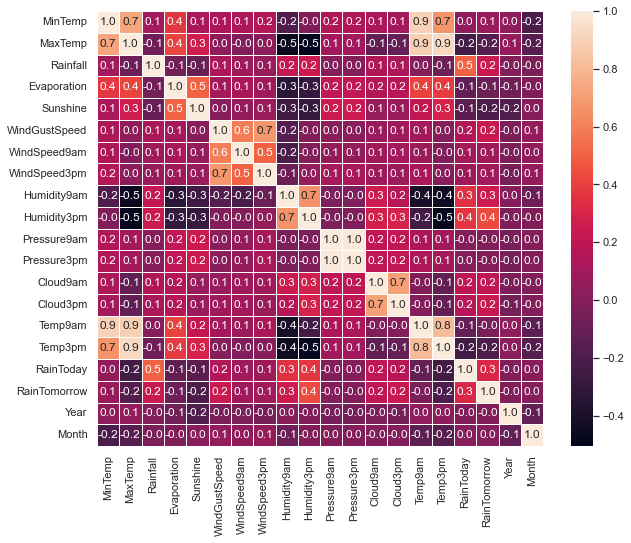

In [24]:
plot = sns.heatmap(correlation, annot = True, fmt=".1f", linewidths=.6)
plot

<AxesSubplot:xlabel='RainTomorrow', ylabel='Humidity9am'>

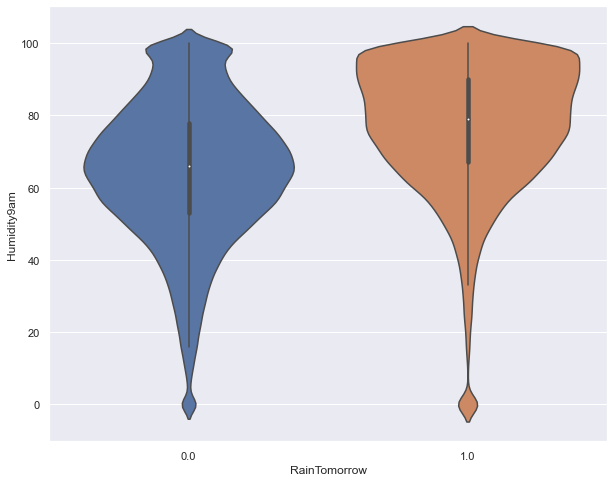

In [25]:
sns.violinplot(x=dataset["RainTomorrow"], y=dataset["Humidity9am"])

<AxesSubplot:xlabel='RainTomorrow', ylabel='Humidity3pm'>

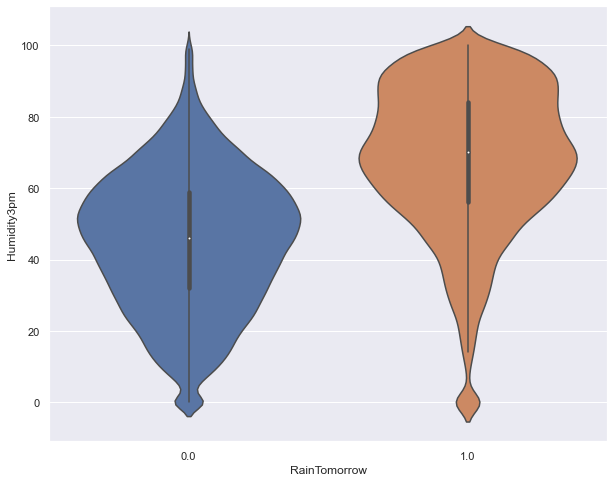

In [26]:
sns.violinplot(x=dataset["RainTomorrow"], y=dataset["Humidity3pm"])

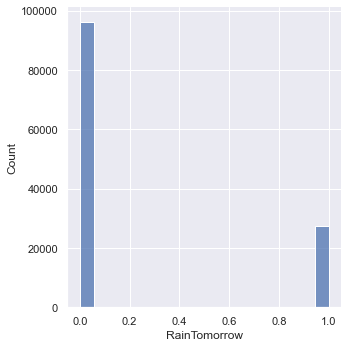

In [27]:
sns.set(rc={"figure.figsize": (8, 4)});
ax = sns.displot(dataset["RainTomorrow"])
plt.show()

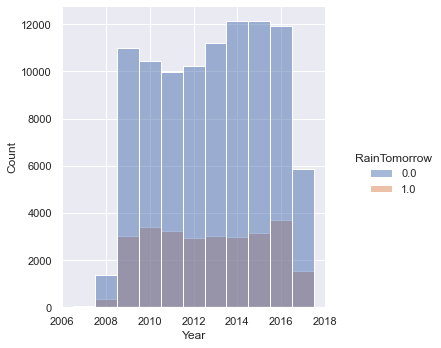

In [28]:
sns.displot(dataset, x="Year", hue="RainTomorrow", discrete=True)

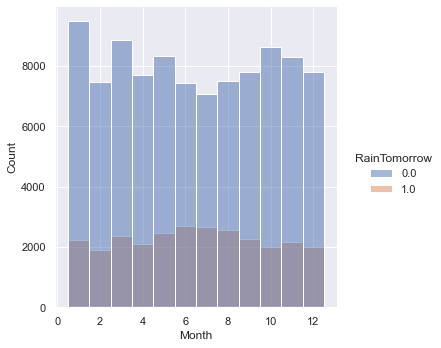

In [29]:
sns.displot(dataset, x="Month", hue="RainTomorrow", discrete=True)

## Normalização dos valores numéricos

In [30]:
dataset.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month
count,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000
mean,12.405046,23.466361,2.375661,3.312966,4.185621,40.685280,15.011689,19.174578,67.100841,50.222819,942.394740,940.602574,2.760230,2.740264,17.221752,21.756361,0.224363,0.221421,2012.806111,6.431824
std,6.375581,7.219787,8.528039,4.258824,4.746062,13.388636,8.307285,8.571039,19.929730,21.580101,265.949534,264.640928,3.122345,3.051790,6.541205,7.221038,0.417164,0.415205,2.528473,3.475113
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,7.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-7.200000,-5.400000,0.000000,0.000000,2007.000000,1.000000
25%,7.800000,18.100000,0.000000,0.000000,0.000000,31.000000,9.000000,13.000000,55.000000,35.000000,1011.400000,1008.900000,0.000000,0.000000,12.500000,16.600000,0.000000,0.000000,2011.000000,3.000000
50%,12.200000,23.000000,0.000000,2.000000,1.000000,39.000000,13.000000,19.000000,68.000000,51.000000,1016.700000,1014.300000,1.000000,1.000000,16.900000,21.300000,0.000000,0.000000,2013.000000,6.000000
75%,17.000000,28.600000,0.800000,5.600000,9.000000,48.000000,20.000000,24.000000,81.000000,65.000000,1021.700000,1019.300000,6.000000,6.000000,21.900000,26.700000,0.000000,0.000000,2015.000000,9.000000
max,33.900000,48.100000,367.600000,86.200000,14.500000,135.000000,87.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,1.000000,1.000000,2017.000000,12.000000


Usar o normalizer

In [31]:
from sklearn.preprocessing import MinMaxScaler

def normalizer(data):
  data = data.values.reshape(-1, 1)
  scaler = MinMaxScaler()
  scaler.fit(data)
  return scaler.transform(data)

In [32]:
for key in dataset.describe().columns:
  dataset[key] = normalizer(dataset[key])

In [33]:
dataset.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month
count,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000
mean,0.493044,0.534336,0.006463,0.038433,0.288664,0.263166,0.153079,0.202054,0.671008,0.502228,0.905278,0.904774,0.306692,0.304474,0.515227,0.521235,0.224363,0.221421,0.580611,0.493802
std,0.150367,0.136480,0.023199,0.049406,0.327315,0.104599,0.097733,0.100836,0.199297,0.215801,0.255475,0.254560,0.346927,0.339088,0.138000,0.138600,0.417164,0.415205,0.252847,0.315919
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.384434,0.432892,0.000000,0.000000,0.000000,0.187500,0.082353,0.129412,0.550000,0.350000,0.971566,0.970469,0.000000,0.000000,0.415612,0.422265,0.000000,0.000000,0.400000,0.181818
50%,0.488208,0.525520,0.000000,0.023202,0.068966,0.250000,0.129412,0.200000,0.680000,0.510000,0.976657,0.975664,0.111111,0.111111,0.508439,0.512476,0.000000,0.000000,0.600000,0.454545
75%,0.601415,0.631380,0.002176,0.064965,0.620690,0.320312,0.211765,0.258824,0.810000,0.650000,0.981460,0.980473,0.666667,0.666667,0.613924,0.616123,0.000000,0.000000,0.800000,0.727273
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Pré-processamento de dados nominais

Desativa a opção de mostrar todas as colunas

In [34]:
pd.set_option('display.max_columns', False)

In [35]:
dataset.select_dtypes(include=[object])

,Location,WindGustDir,WindDir9am,WindDir3pm
0,Albury,W,W,WNW
1,Albury,WNW,NNW,WSW
2,Albury,WSW,W,WSW
3,Albury,NE,SE,E
4,Albury,W,ENE,NW
...,...,...,...,...
145454,Uluru,E,ESE,E
145455,Uluru,E,SE,ENE
145456,Uluru,NNW,SE,N
145457,Uluru,N,SE,WNW


In [36]:
for column in dataset.select_dtypes(include=[object]):
  dataset[column] = dataset[column].astype(str)

### Visualização das colunas de tipo Object

In [37]:
dataset.Location.unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond', 'Sydney',
       'SydneyAirport', 'WaggaWagga', 'Williamtown', 'Wollongong',
       'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat', 'Bendigo',
       'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura', 'Nhil',
       'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Witchcliffe', 'PearceRAAF', 'PerthAirport', 'Perth',
       'SalmonGums', 'Walpole', 'Hobart', 'Launceston', 'AliceSprings',
       'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [38]:
 dataset.WindGustDir.unique()

array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', 'ENE', 'SSE',
       'S', 'NW', 'SE', 'ESE', 'E', 'SSW'], dtype=object)

In [39]:
dataset.WindDir9am.unique()

array(['W', 'NNW', 'SE', 'ENE', 'SW', 'SSE', 'S', 'NE', 'SSW', 'N', 'WSW',
       'ESE', 'E', 'NW', 'WNW', 'NNE'], dtype=object)

In [40]:
dataset.WindDir3pm.unique()

array(['WNW', 'WSW', 'E', 'NW', 'W', 'SSE', 'ESE', 'ENE', 'NNW', 'SSW',
       'SW', 'SE', 'N', 'S', 'NNE', 'NE'], dtype=object)

### One Hot Encoding de atributos categóricos

In [41]:
dataset = pd.get_dummies(dataset, columns=["Location", "WindGustDir", "WindDir9am", "WindDir3pm"])

In [42]:
dataset.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Location_Adelaide,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,Location_CoffsHarbour,Location_Dartmoor,Location_Darwin,Location_GoldCoast,Location_Hobart,Location_Katherine,Location_Launceston,Location_Melbourne,Location_MelbourneAirport,Location_Mildura,Location_Moree,Location_MountGambier,Location_MountGinini,Location_Nhil,Location_NorahHead,Location_NorfolkIsland,Location_Nuriootpa,Location_PearceRAAF,Location_Penrith,Location_Perth,Location_PerthAirport,Location_Portland,Location_Richmond,Location_Sale,Location_SalmonGums,Location_Sydney,Location_SydneyAirport,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera,WindGustDir_E,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir9am_E,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir3pm_E,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,0.516509,0.523629,0.001632,0.0,0.0,0.289062,0.211765,0.258824,0.71,0.22,0.968012,0.968738,0.888889,0.000000,0.508439,0.522073,0.0,0.0,0.1,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0.375000,0.565217,0.000000,0.0,0.0,0.289062,0.023529,0.235294,0.44,0.25,0.970797,0.969411,0.000000,0.000000,0.514768,0.570058,0.0,0.0,0.1,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0.504717,0.576560,0.000000,0.0,0.0,0.304688,0.200000,0.282353,0.38,0.30,0.967915,0.970277,0.000000,0.222222,0.594937,0.548944,0.0,0.0,0.1,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0.417453,0.620038,0.000000,0.0,0.0,0.132812,0.105882,0.082353,0.45,0.16,0.977522,0.974221,0.000000,0.000000,0.533755,0.612284,0.0,0.0,0.1,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.613208,0.701323,0.002720,0.0,0.0,0.265625,0.058824,0.211765,0.82,0.33,0.970989,0.967680,0.777778,0.888889,0.527426,0.673704,0.0,0.0,0.1,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


## Oversampling

In [43]:
from collections import Counter
print(Counter(dataset["RainTomorrow"]))

Counter({0.0: 96318, 1.0: 27392})


In [44]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=42, sampling_strategy=0.5)

In [45]:
X = dataset.drop(columns="RainTomorrow")
y = dataset["RainTomorrow"]

In [46]:
X_bal, y_bal = sm.fit_resample(X, y)

In [47]:
print(Counter(y_bal))

Counter({0.0: 96318, 1.0: 48159})


**Separação do dataset de treino e teste**

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_bal, y_bal, test_size=0.33, random_state=12)

In [49]:
X_train

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Year,Month,Location_Adelaide,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,Location_CoffsHarbour,Location_Dartmoor,Location_Darwin,Location_GoldCoast,Location_Hobart,Location_Katherine,Location_Launceston,Location_Melbourne,Location_MelbourneAirport,Location_Mildura,Location_Moree,Location_MountGambier,Location_MountGinini,Location_Nhil,Location_NorahHead,Location_NorfolkIsland,Location_Nuriootpa,Location_PearceRAAF,Location_Penrith,Location_Perth,Location_PerthAirport,Location_Portland,Location_Richmond,Location_Sale,Location_SalmonGums,Location_Sydney,Location_SydneyAirport,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera,WindGustDir_E,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir9am_E,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir3pm_E,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
38514,0.502358,0.674858,0.000000,0.000000,0.000000,0.281250,0.023529,0.129412,0.690000,0.330000,0.978482,0.976433,0.000000,0.444444,0.554852,0.654511,0.0,0.900000,0.090909,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
87052,0.391509,0.591682,0.000000,0.000000,0.000000,0.218750,0.200000,0.152941,0.560000,0.250000,0.981748,0.980569,0.000000,0.111111,0.531646,0.606526,0.0,1.000000,0.272727,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
103845,0.636792,0.559546,0.000000,0.129930,0.034483,0.234375,0.105882,0.082353,0.480000,0.870000,0.971374,0.970085,0.777778,0.888889,0.603376,0.500960,0.0,1.000000,0.181818,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
130971,0.345217,0.347538,0.000438,0.023029,0.031492,0.362991,0.234952,0.263392,0.829094,0.852395,0.965115,0.958898,0.777778,0.888889,0.354710,0.320301,0.0,0.380582,0.636364,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
5511,0.412736,0.368620,0.026115,0.053364,0.000000,0.234375,0.235294,0.129412,0.760000,0.590000,0.979539,0.979608,0.555556,0.777778,0.388186,0.368522,1.0,0.300000,0.727273,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

# Treinamento

Otimização de hiperparametros



SVM


LogisticRegression


Decision Tree


Random Forest


KNN



In [50]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

### Naive Bayes

https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB

In [51]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train, y_train)

MultinomialNB()

In [52]:
y_pred = clf.predict(X_test)

In [53]:
print(classification_report(y_test, y_pred))
clf_metrics = []
clf_metrics.append(classification_report(y_test, y_pred, output_dict=True))

              precision    recall  f1-score   support

         0.0       0.78      0.86      0.81     31833
         1.0       0.63      0.50      0.56     15845

    accuracy                           0.74     47678
   macro avg       0.70      0.68      0.69     47678
weighted avg       0.73      0.74      0.73     47678



<AxesSubplot:>

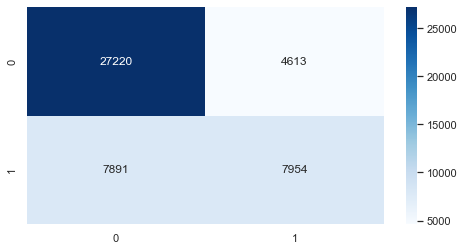

In [54]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, 
            fmt='d', cmap='Blues')

In [1]:
y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)

plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

NameError: name 'clf' is not defined

In [2]:
y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.legend(loc=4)
plt.show()

NameError: name 'clf' is not defined

### Decision Tree

https://scikit-learn.org/stable/modules/tree.html

In [55]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

clf = DecisionTreeClassifier(random_state=0, max_depth=2, min_samples_leaf=10)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
clf_metrics.append(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.81      0.86      0.83     31833
         1.0       0.68      0.60      0.64     15845

    accuracy                           0.77     47678
   macro avg       0.74      0.73      0.74     47678
weighted avg       0.77      0.77      0.77     47678



<AxesSubplot:>

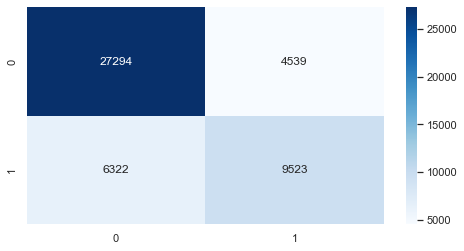

In [56]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, 
            fmt='d', cmap='Blues')

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html?highlight=random%20forest#sklearn.ensemble.RandomForestClassifier

In [57]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=2, random_state=1)
clf = clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print(classification_report(y_test, y_pred))
clf_metrics.append(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.72      0.98      0.83     31833
         1.0       0.86      0.23      0.37     15845

    accuracy                           0.73     47678
   macro avg       0.79      0.61      0.60     47678
weighted avg       0.77      0.73      0.68     47678



<AxesSubplot:>

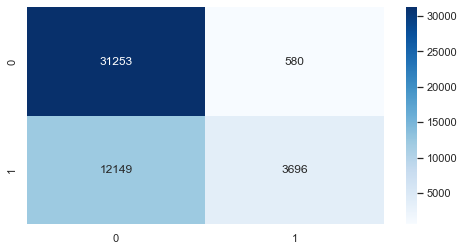

In [58]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, 
            fmt='d', cmap='Blues')